# time resampling

In [1]:
pwd

'C:\\Users\\Sneha\\mywork\\tsa_cou_fol'

In [2]:
import pandas as pd

In [8]:
df = pd.read_csv('Data/starbucks.csv', index_col='Date', parse_dates=True)

In [9]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [10]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [12]:
#daily data to yearly data

df.resample('A').max()

,Close,Volume
Date,,
2015-12-31,59.8475,38107194
2016-12-31,58.0465,32820193
2017-12-31,62.4924,53454789
2018-12-31,68.3530,62091071


In [13]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


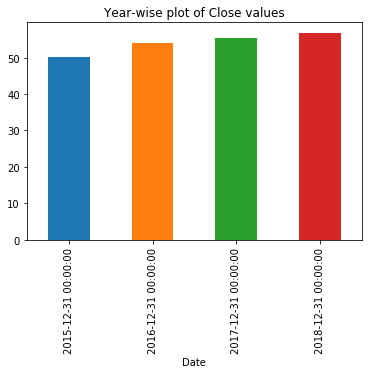

In [17]:
df['Close'].resample('A').mean().plot.bar(title="Year-wise plot of Close values")

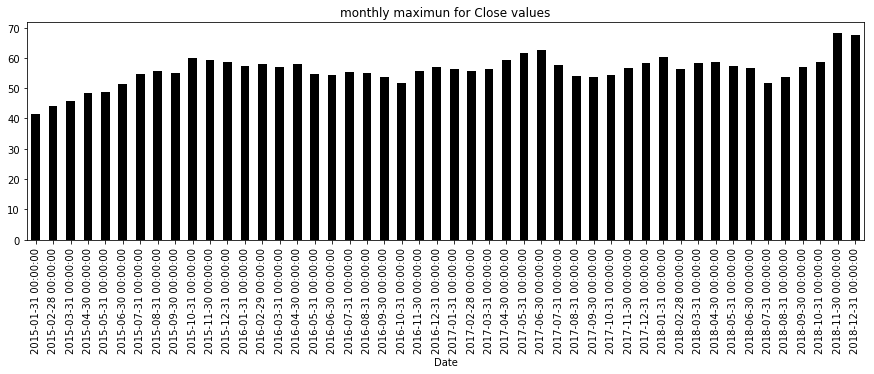

In [25]:
#monthly max closing price 

df['Close'].resample('M').max().plot.bar(figsize=(15,4), title="monthly maximun for Close values", color='K')

# time shifting



In [35]:
df.tail(4)

,Close,Volume
Date,,
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [36]:
df.head(4)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554


shifting by 1 means shifting the values of all columns down by 1 unit. this way the first row index gets null values. the last row's information bits will be lost. 

generally for n, first n rows will be empty and last n rows will lose their info. 

In [34]:
df.shift(1).head(4)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0


you can also shift up by specifying a Negative No. inside shift. that way the rows from the beginning will lose values and the ones in the end will have empty places.

In [ ]:
df.shift(-1).tail()

You can shift everything based on <b> time series frequency codes </b>

In [1]:
pwd

'C:\\Users\\Sneha\\mywork\\tsa_cou_fol'

# rolling and expanding

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Data/starbucks.csv', index_col='Date', parse_dates=True)

In [4]:
df.head(3)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340


In [5]:
df.columns


Index(['Close', 'Volume'], dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021456F57898>,
      dtype=object)

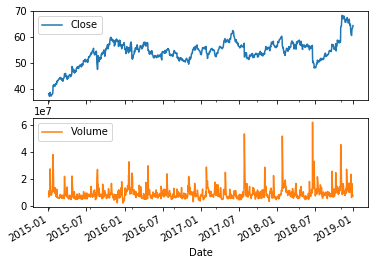

In [6]:
df.plot(subplots=True)

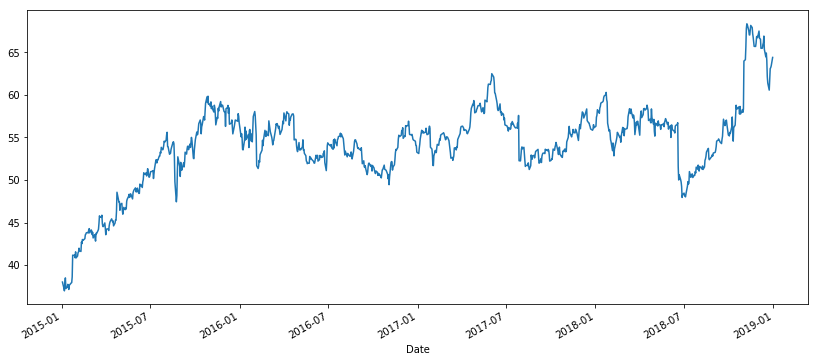

In [7]:
df['Close'].plot(figsize=(14,6))

In [8]:
#adding a rolling mean

#create a 7-day window

#ie its gonna take each section of 7 days from the data and perform some sorta aggr on that eg mean.

#so every 7 days we'll take an avg and keep rolling along with that 7daywindow.

df.rolling(window=7).mean().head(15)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


so whenever you take a rolling mean for say window=n. Then for first n-1 values, you'll have NaN. Coz it needs to reach atleast first n-values to calculate the first aggregate.

thats why above 7-1 = 6 values have NaN.

for 2015-01-12, the mean values represent 

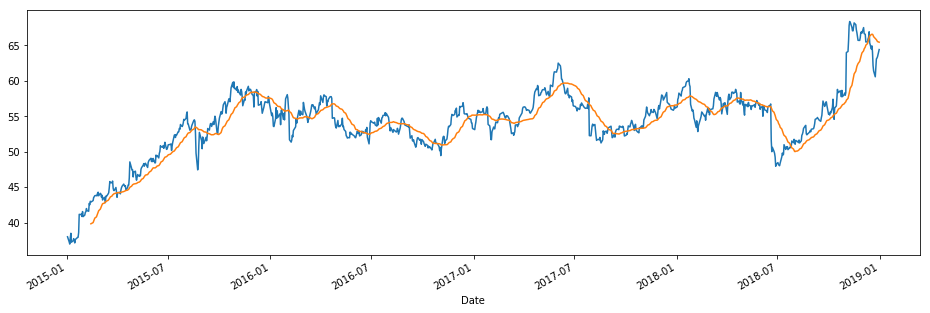

In [11]:
df['Close'].plot( figsize=(16,5))

#avg price per 30 day window
df.rolling(30).mean()['Close'].plot()

for larger window sizes, the orange rolling curve becomes smoother and smoother. while for smaller windows it fits closely with the blue lined original data curve.

to add a legend to the graph, just make the rolling mean a new column of df and then pandas can do it automatically.

In [12]:
df['Close_30daymean'] = df['Close'].rolling(window = 30).mean()

In [15]:
df.head(31)  #first 29 values empyty

,Close,Volume,Close_30daymean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN
2015-01-09,37.2361,27556706,NaN
2015-01-12,37.4415,10021486,NaN
2015-01-13,37.7401,11040702,NaN
2015-01-14,37.5301,9295084,NaN


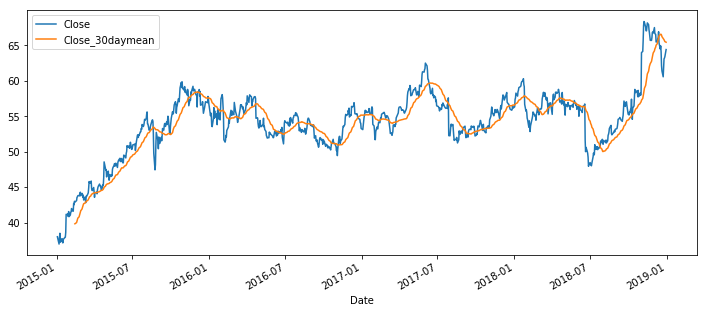

In [17]:
df[ ['Close', 'Close_30daymean'] ].plot(figsize=(12,5))

rolling grabs a window of whatever size you want and then aggregates data that comes in each window.

what if you wanted to calculate the aggr from the time-series-beginning to that time-data-point? 

like for each datapoint you want to take all the datapoints before it + that datapoint and aggregate all of them.

use expanding. 

In [19]:
df['Close'].expanding(min_periods=1).mean().head(7)

Date
2015-01-02    38.006100
2015-01-05    37.642100
2015-01-06    37.419667
2015-01-07    37.535950
2015-01-08    37.727980
2015-01-09    37.646000
2015-01-12    37.616786
Name: Close, dtype: float64

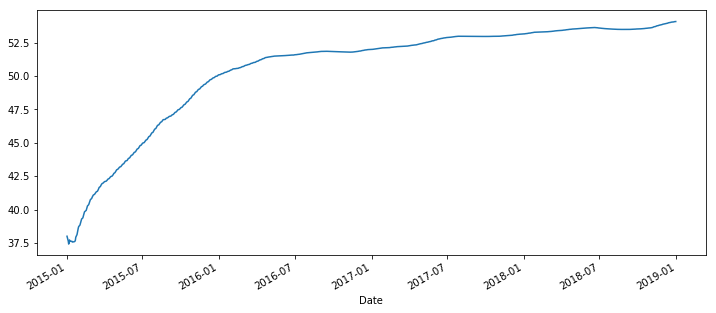

In [20]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(12,5))

last data point = avg of the entire column (the one in top right)

the window here keeps 'expanding' as you move down in the series.

whereas in rolling, the same window is 'rolling' over the entire series.